In [50]:
# Computational Physics Project 5 - Time Dependent Schrodinger Equation
# 
#

import numpy as np
import scipy as sp
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


In [139]:
# constants

L = 5 # length of domain [-L/2, L/2]
T = 5 # total time 
nx = 100
nt = 100

x = np.linspace(-L/2,L/2,nx)

dx = L / nx
dt = T / nt

a = (dt/dx**2) * 1.0j

def V(i):
    
    return 0


In [140]:
# Hamiltonian matrix

def diagonal(i):
    return 1 - 2*a + a*(dx**2)*V(i)

def constructH(nx,nt,a):
    off = a*np.ones(nx-1)
    dia = np.asarray([diagonal(i) for i in range(nx)])
    
    H = np.diag(dia) + np.diag(off,k=1) + np.diag(off,k=-1)
        
    return H

H = constructH(nx,nt,a)

[[ 1.-40.j  0.+20.j  0. +0.j ...,  0. +0.j  0. +0.j  0. +0.j]
 [ 0.+20.j  1.-40.j  0.+20.j ...,  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.+20.j  1.-40.j ...,  0. +0.j  0. +0.j  0. +0.j]
 ..., 
 [ 0. +0.j  0. +0.j  0. +0.j ...,  1.-40.j  0.+20.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...,  0.+20.j  1.-40.j  0.+20.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...,  0. +0.j  0.+20.j  1.-40.j]]


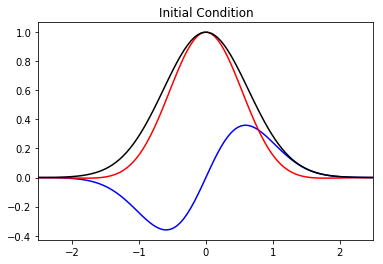

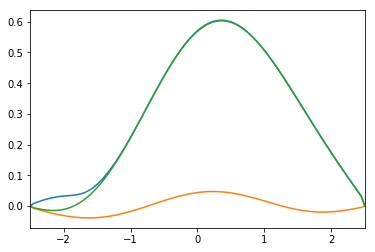

In [146]:
def initPsi(x,nx,k):
    
    return np.exp(-x**2/0.8 + k*x*1.0j)
    
k = 1
psi = np.zeros([nt,nx],dtype=complex) # column n is solution at all points j at time n
psi[0,:] = initPsi(x,nx,k)

plt.plot(x,np.imag(psi[0,:]),color='b')
plt.plot(x,np.real(psi[0,:]),color='r')
plt.plot(x,np.absolute(psi[0,:]),color='k')
plt.xlim([-L/2,L/2])
plt.title("Initial Condition")
plt.show()

for n in range(nt-1):
    psi[n+1,:] = np.linalg.solve(H,psi[n,:])
    psi[n+1,0] = 0
    psi[n+1,-1] = 0 
        

plt.plot(x,np.absolute(psi[80,:]))
plt.plot(x,np.real(psi[80,:]))
plt.plot(x,np.imag(psi[80,:]))
plt.xlim([-L/2,L/2])
plt.show()



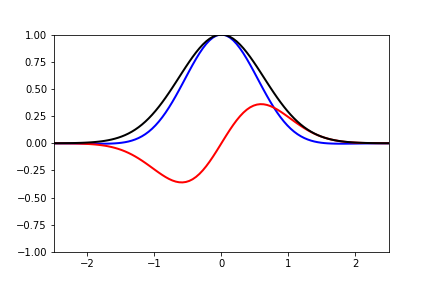
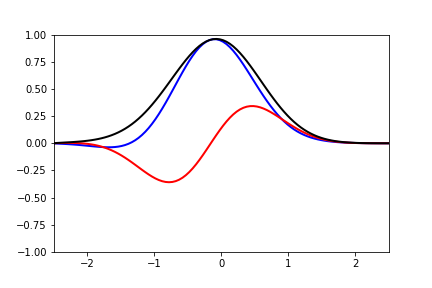
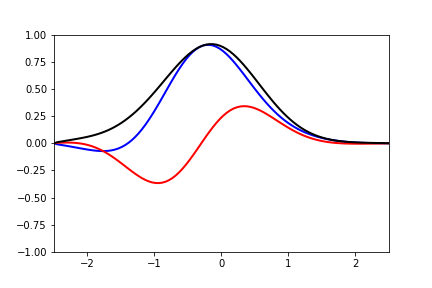
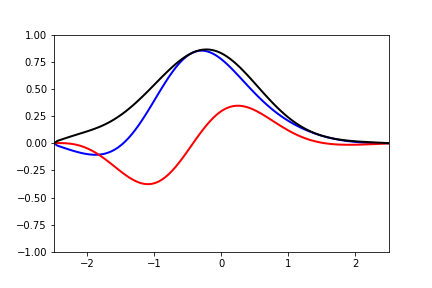
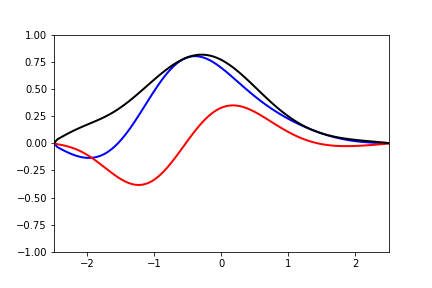
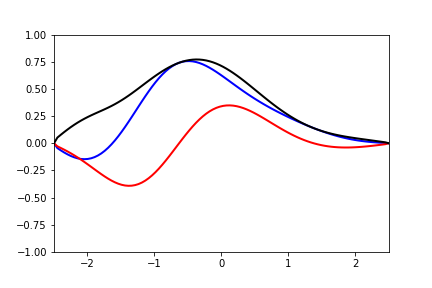
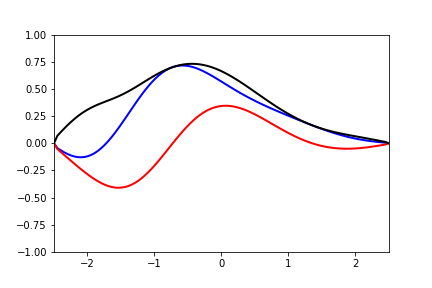
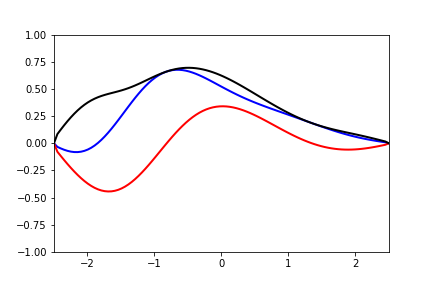
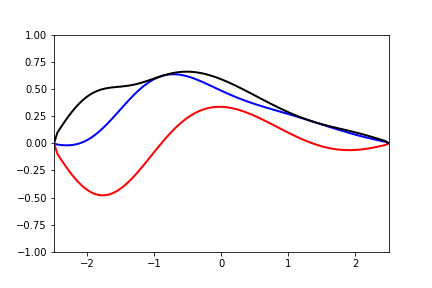
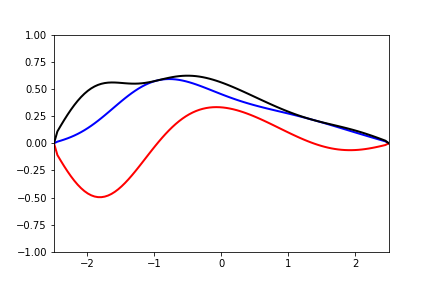
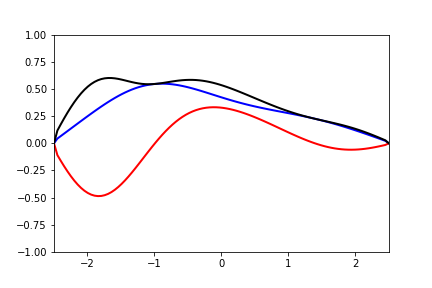
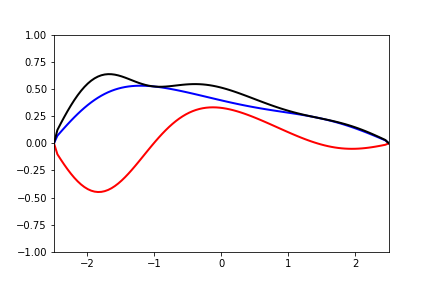
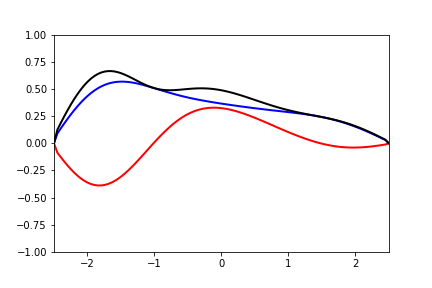
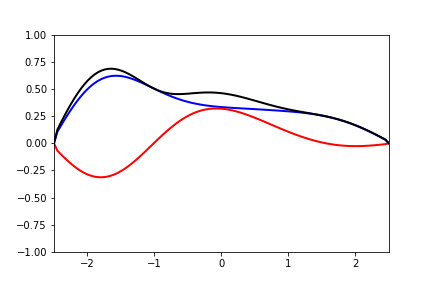
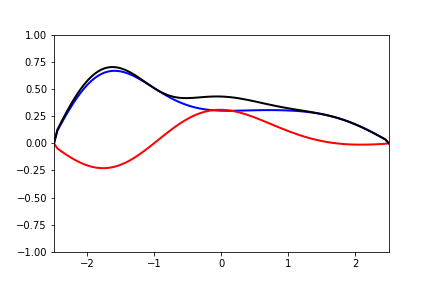
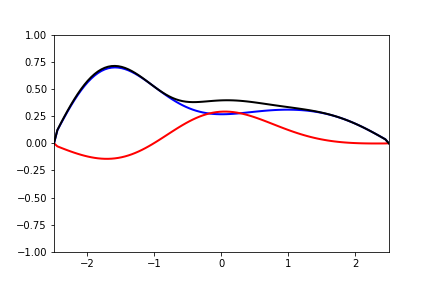
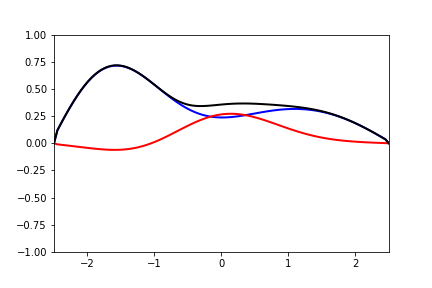
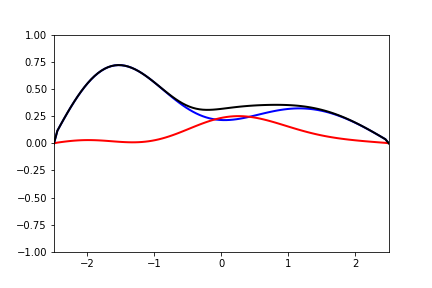
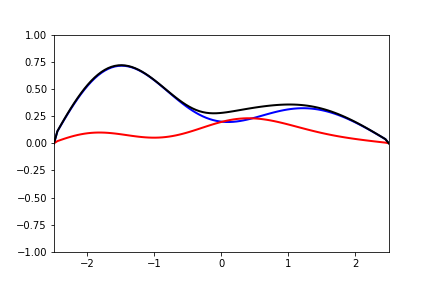
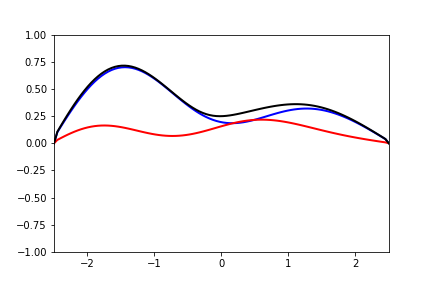
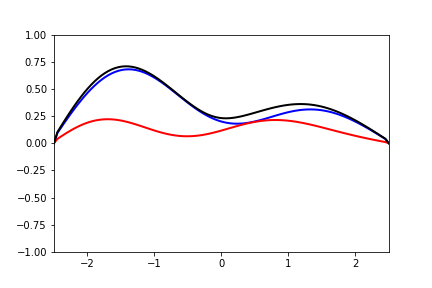
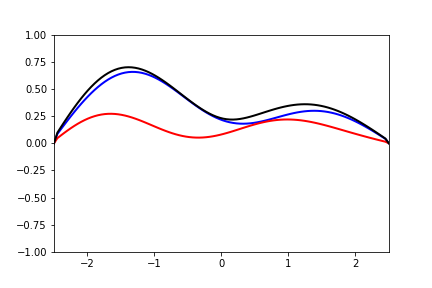
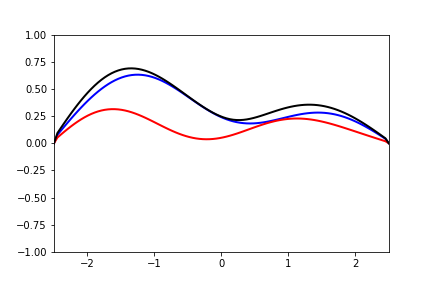
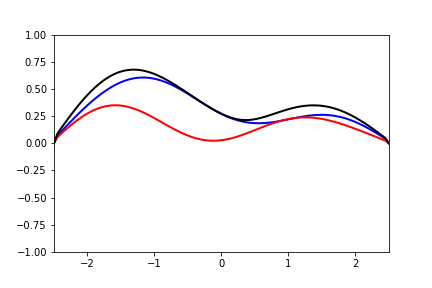
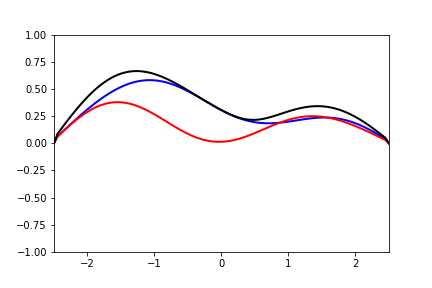
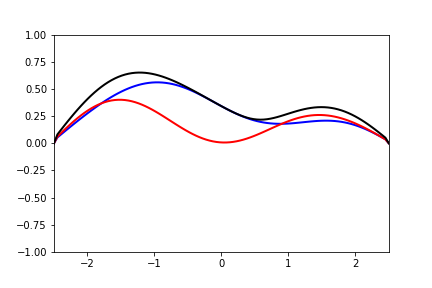
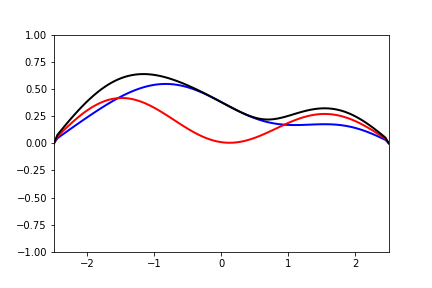
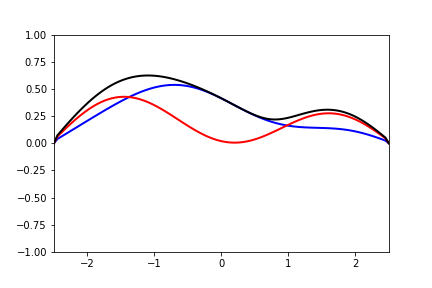
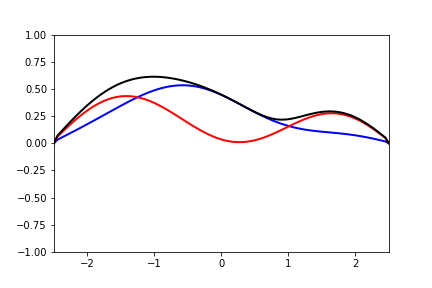
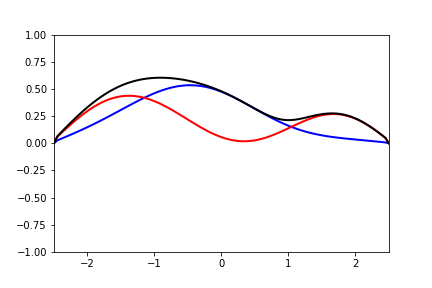
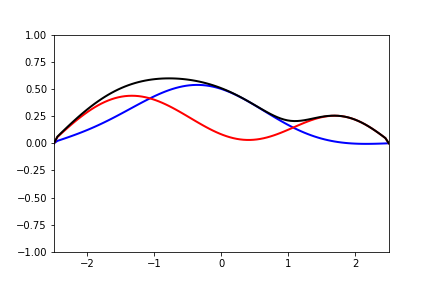
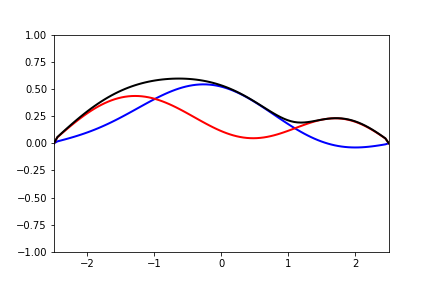
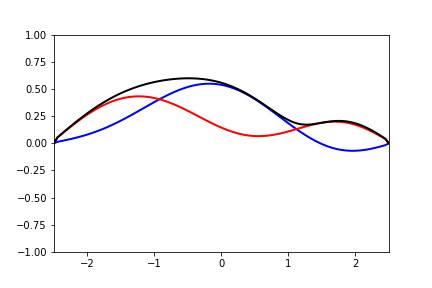
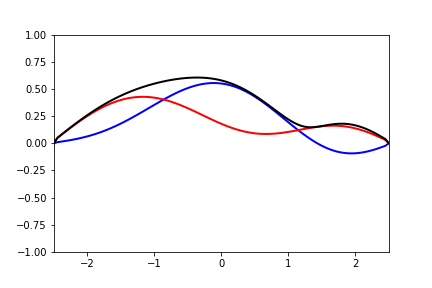
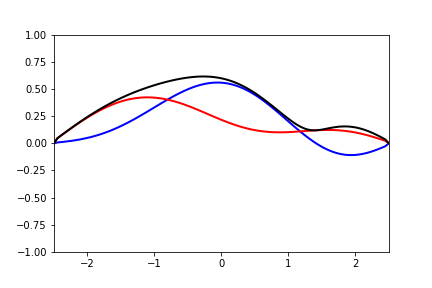
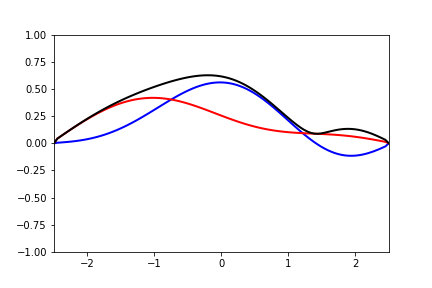
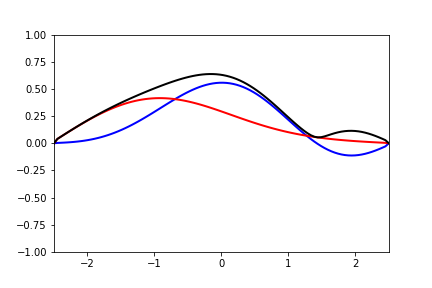
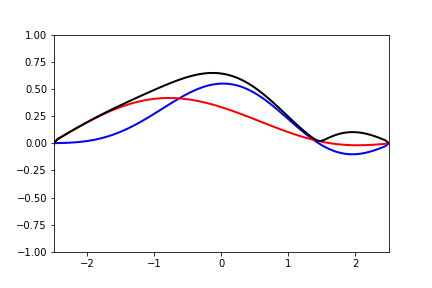
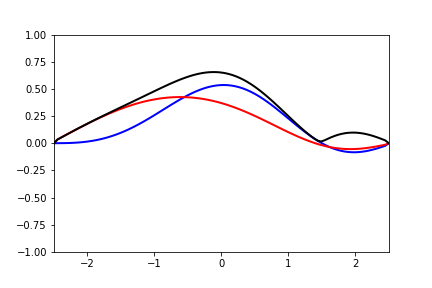
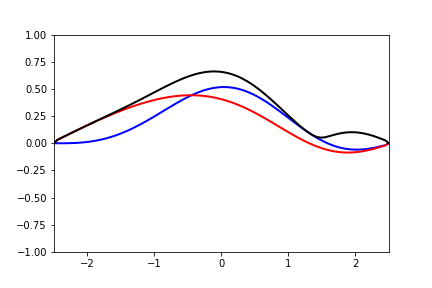
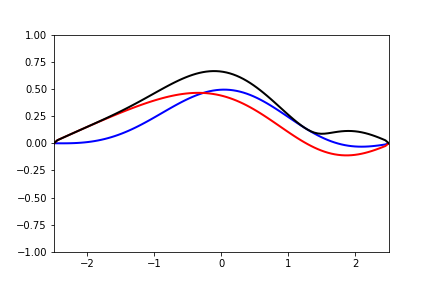
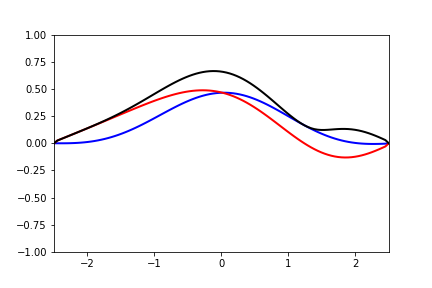
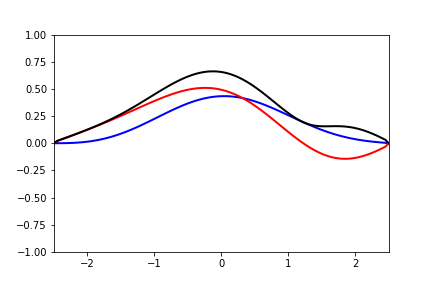
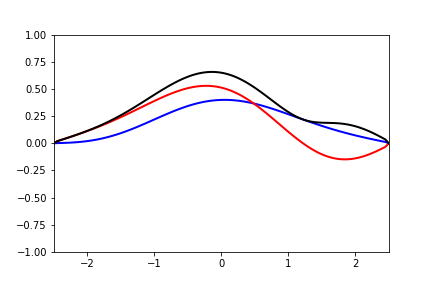
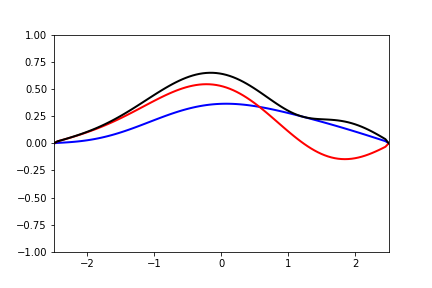
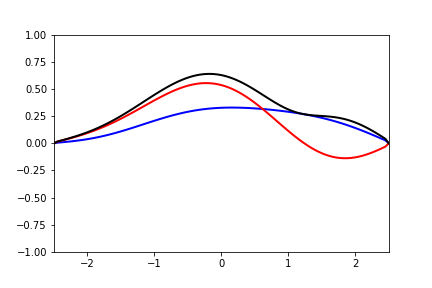
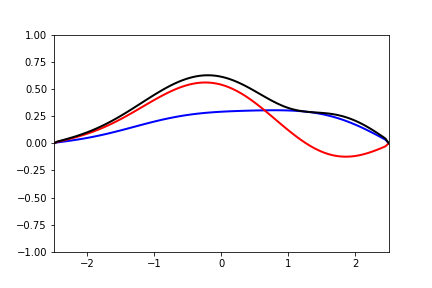
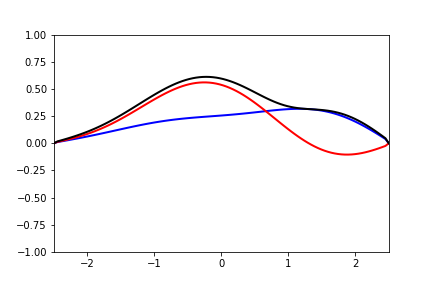
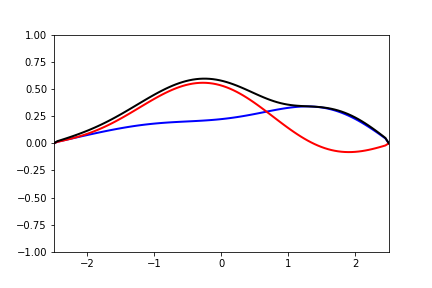
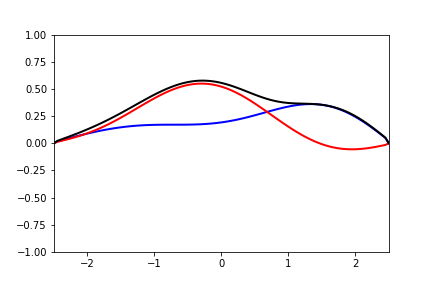
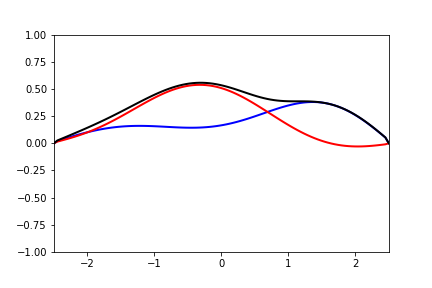
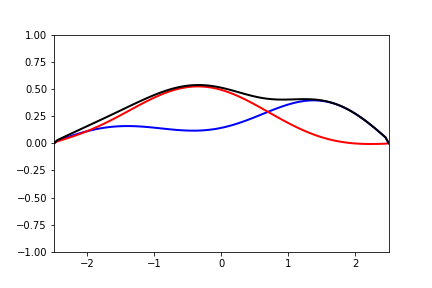
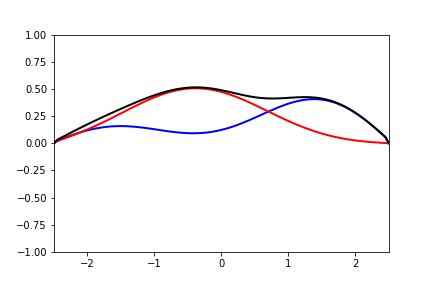
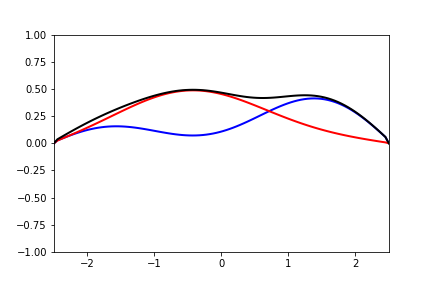
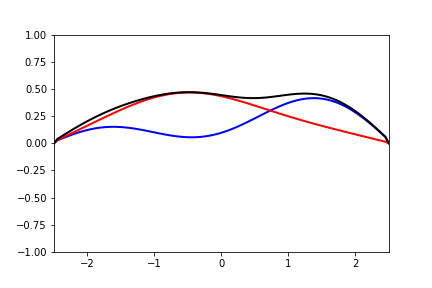
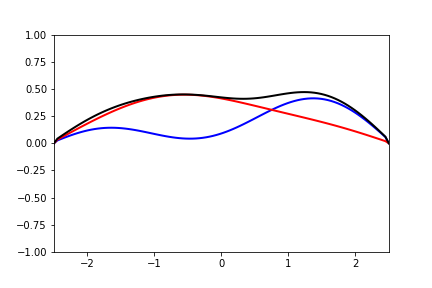
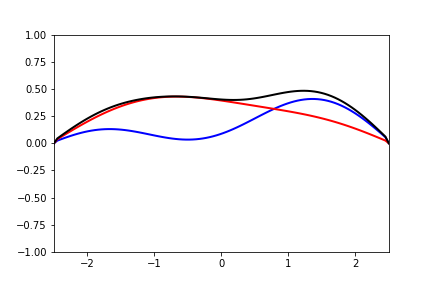
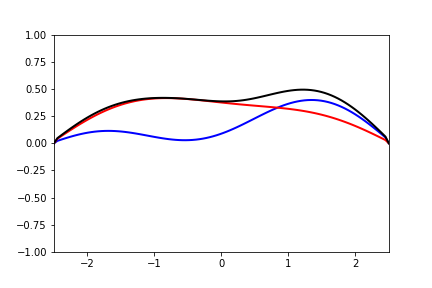
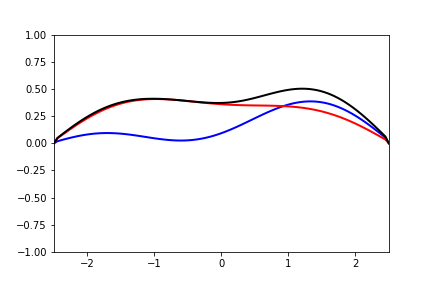
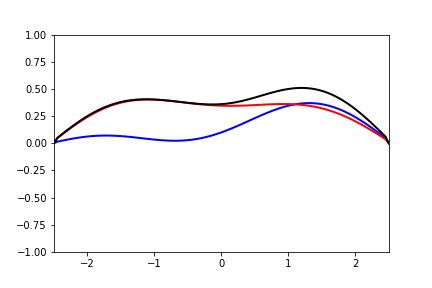
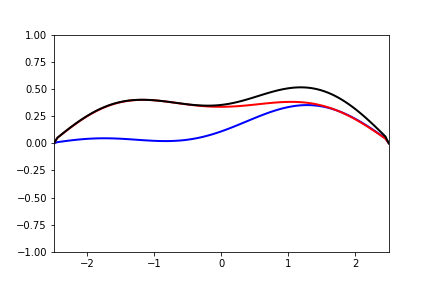
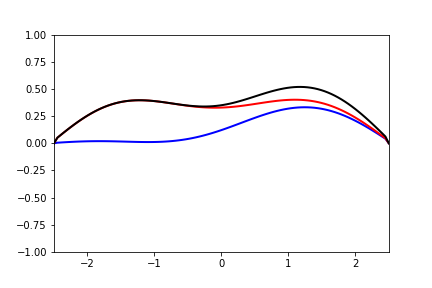
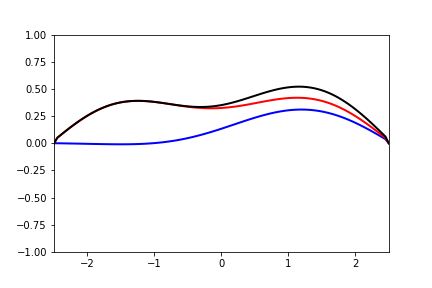
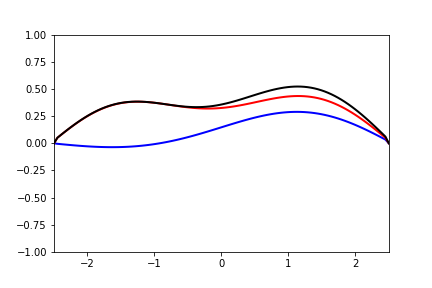
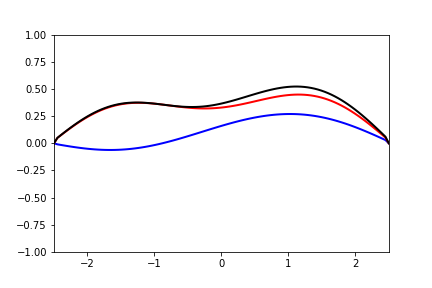
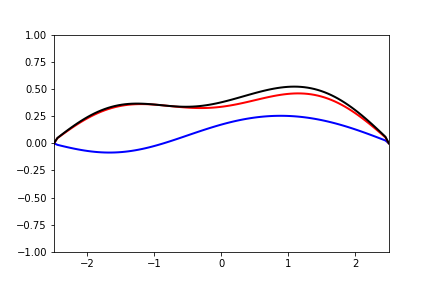
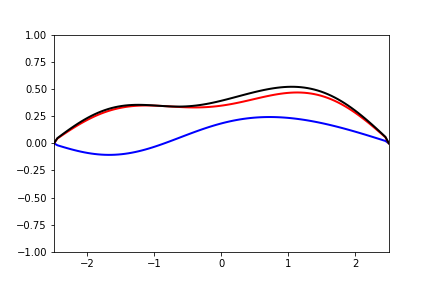
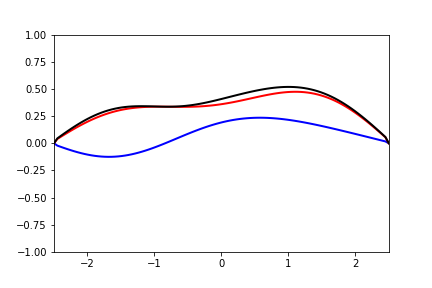
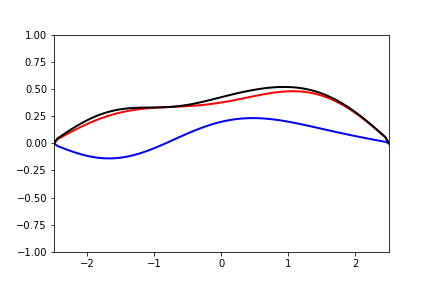
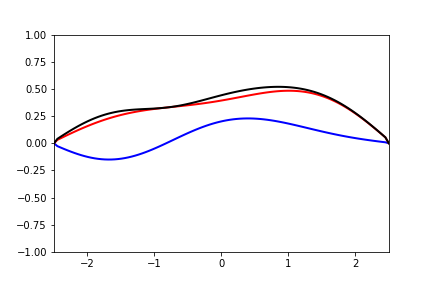
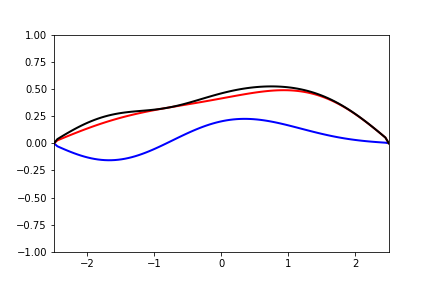
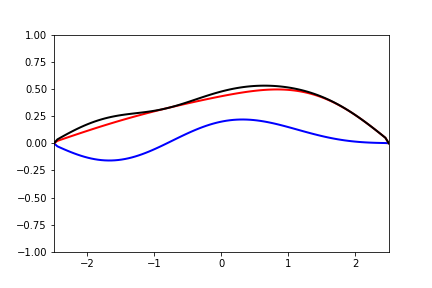
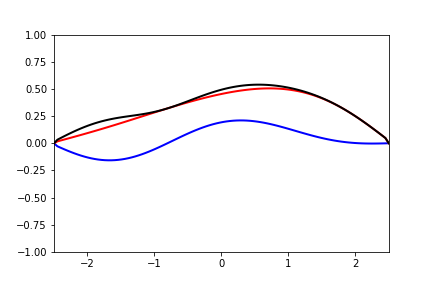
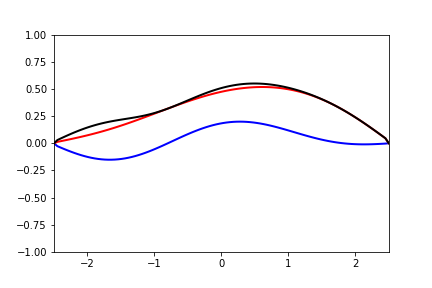
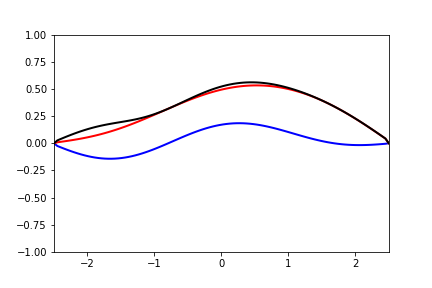
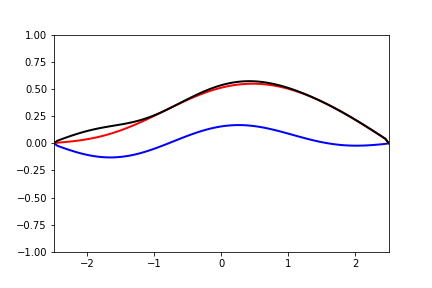
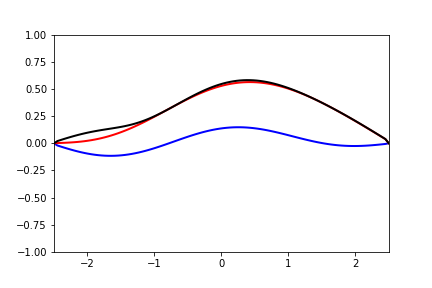
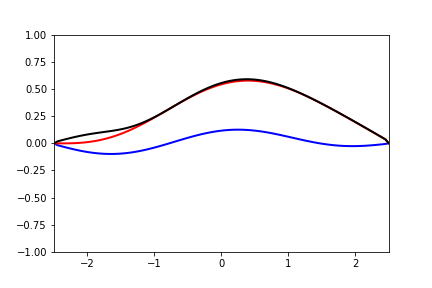
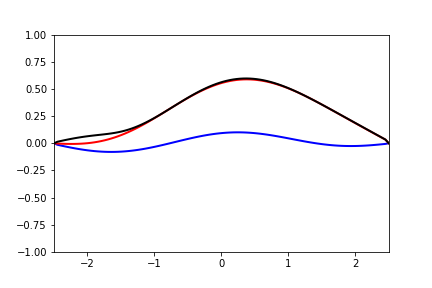
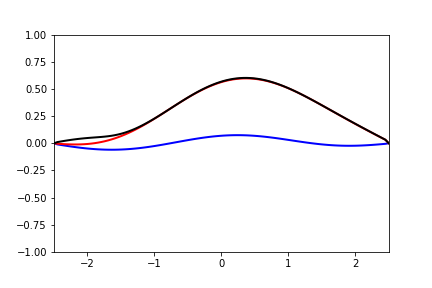
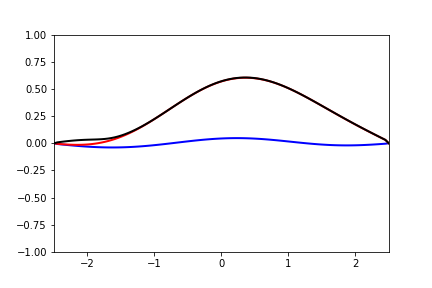
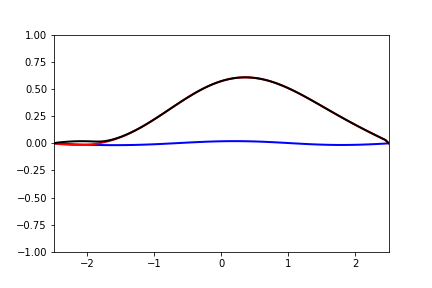
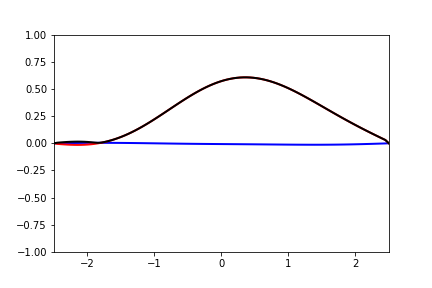
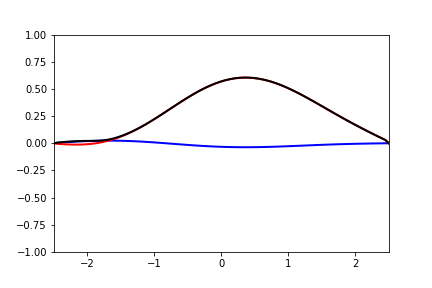
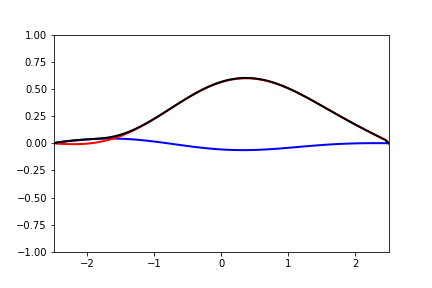
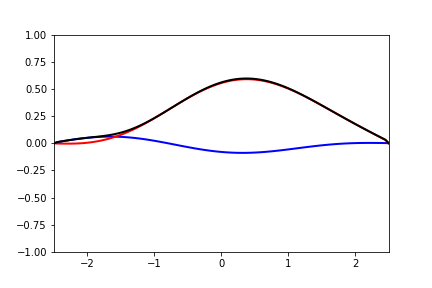
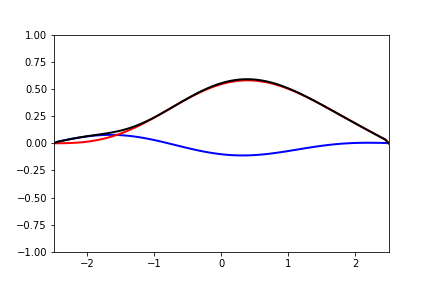
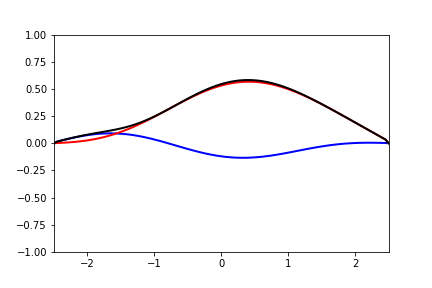
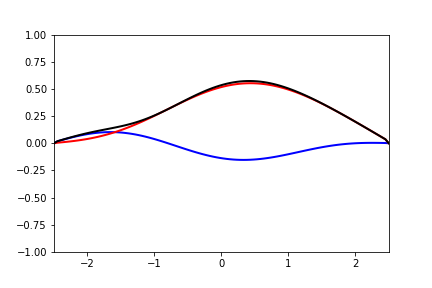
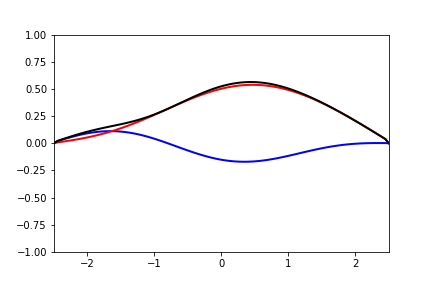
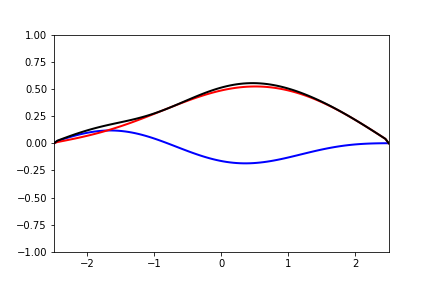
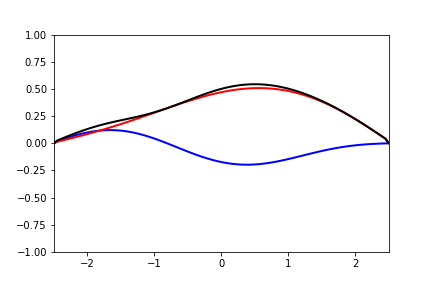
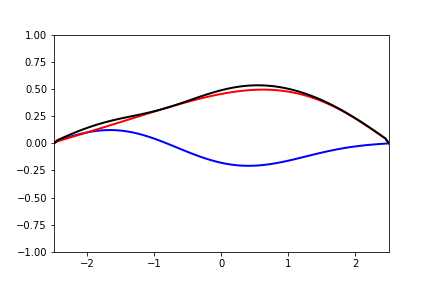
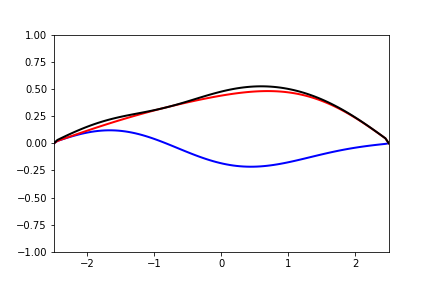
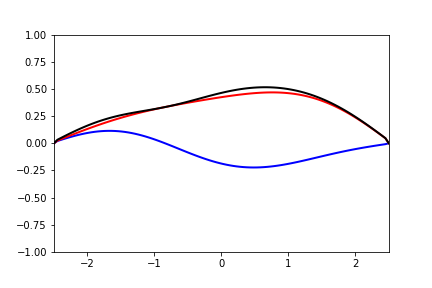
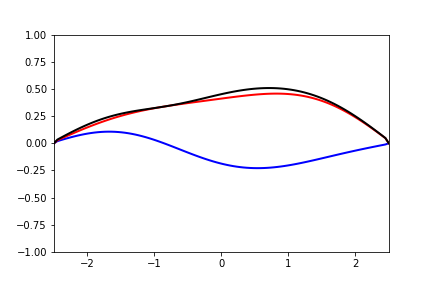
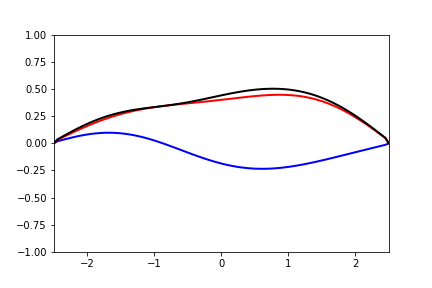
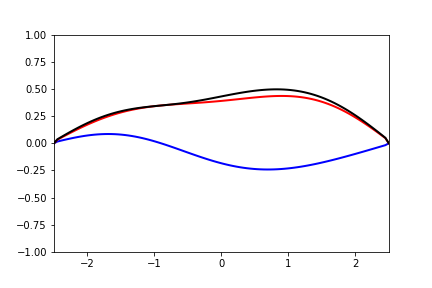
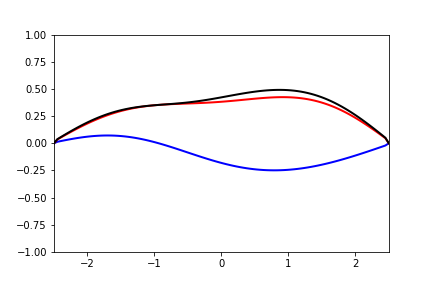
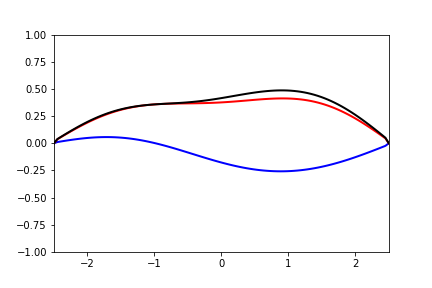

In [147]:
# Animations
def animate(data):
    x = np.linspace(-L/2,L/2,nx)
    y = data
    real.set_data(x,np.real(y))
    imag.set_data(x,np.imag(y))
    abso.set_data(x,np.absolute(y))
    return real,imag,abso

fig = plt.figure()
ax = plt.axes(xlim=(-L/2,L/2),ylim=(-1,1))
real, = ax.plot([],[],lw=2,color='b')
imag, = ax.plot([],[],lw=2,color='r')
abso, = ax.plot([],[],lw=2,color='k')

anim = animation.FuncAnimation(fig,animate,frames=psi,interval=100)
display_animation(anim,default_mode='loop')
